#Análisis del Problema

El conjunto de datos contiene información sobre el porcentaje de grasa corporal en 252 hombres. Estas estimaciones se basan en mediciones de densidad corporal obtenidas mediante pesaje bajo el agua y diversas medidas de circunferencia corporal. Se pretende predecir la masa corporal de una persona con respecto al conjunto de características que posee.

## Descarga de los archivos de datos:
https://drive.google.com/file/d/15ui4mn7JH1afXhr5cLr3ewXOpv1MWG45/view?usp=sharing



### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **Density**: Densidad corporal determinada mediante pesaje bajo el agua.
* **BodyFat**: Porcentaje de grasa corporal calculado utilizando la ecuación de Siri (1956).
* **Age**:Edad en años.
* **Weight**: Peso en libras.
* **Height**: Altura en pulgadas.
* **Neck**: Circunferencia del cuello en centímetros.
* **Chest**: Circunferencia del pecho en centímetros.
* **Abdomen**: Circunferencia del abdomen 2 en centímetros.
* **Hip**: Circunferencia de cadera en centímetros.
* **Thign**: Circunferencia del muslo en centímetros.
* **Knee**: Circunferencia de la rodilla en centímetros.
* **Ankle**: Circunferencia del tobillo en centímetros.
* **Biceps**: Circunferencia del bíceps (extendido) en centímetros.
* **Forearm**: Circunferencia del antebrazo en centímetros.
* **Wrist**: Circunferencia de la muñeca en centímetros.

#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib

%matplotlib inline
import matplotlib.pyplot as plt


from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/bodyfat.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [ ]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado una lista vacia, lo que significa que en este dataset no existen nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

Tampoco existen valores infinitos. Ya que de manera similar al caso anterior con los nulos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

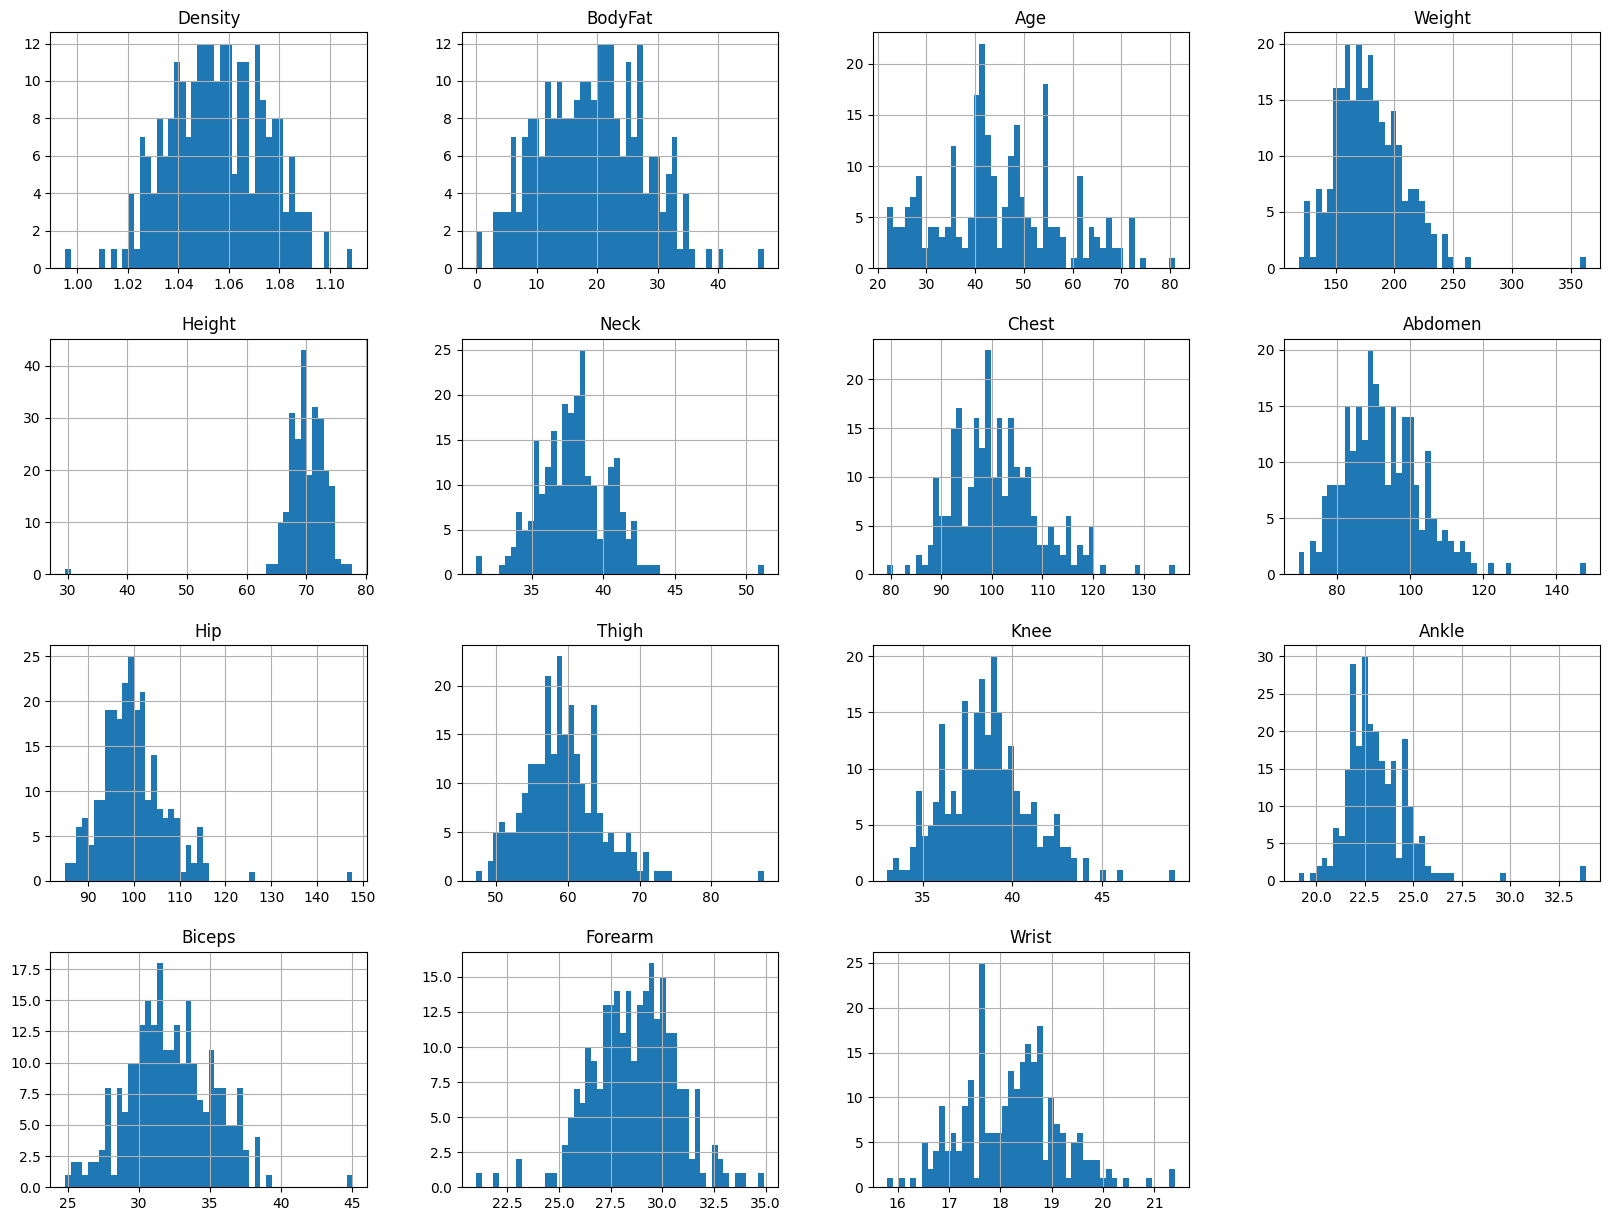

In [ ]:
# Representamos gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Mostramos correlación lineal entre todos los atributos del conjunto de datos
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


En la siguiente instrucción podemos ver que hay una fuerte correlación entre **BodyFat** que es la variable de salida con **Abdomen**:

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df.corr()
corr_matrix["BodyFat"].sort_values(ascending=False)

BodyFat    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height    -0.089495
Density   -0.987782
Name: BodyFat, dtype: float64

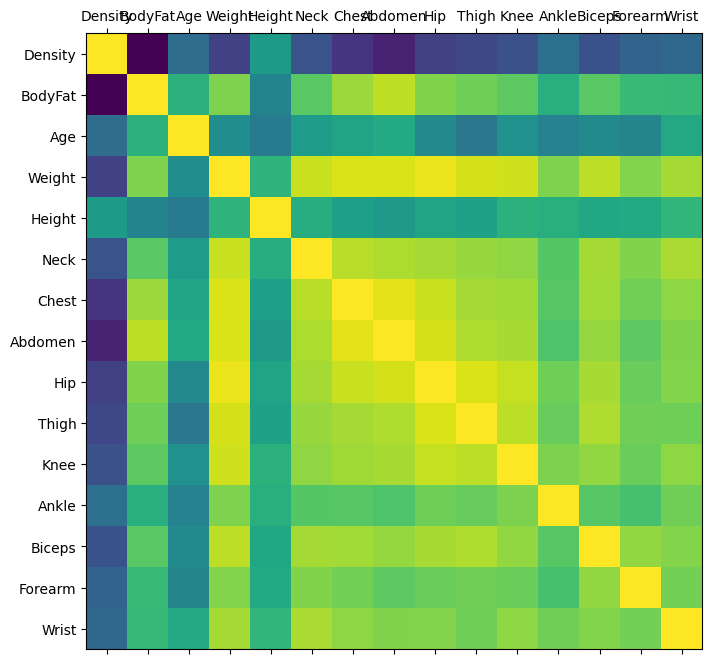

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

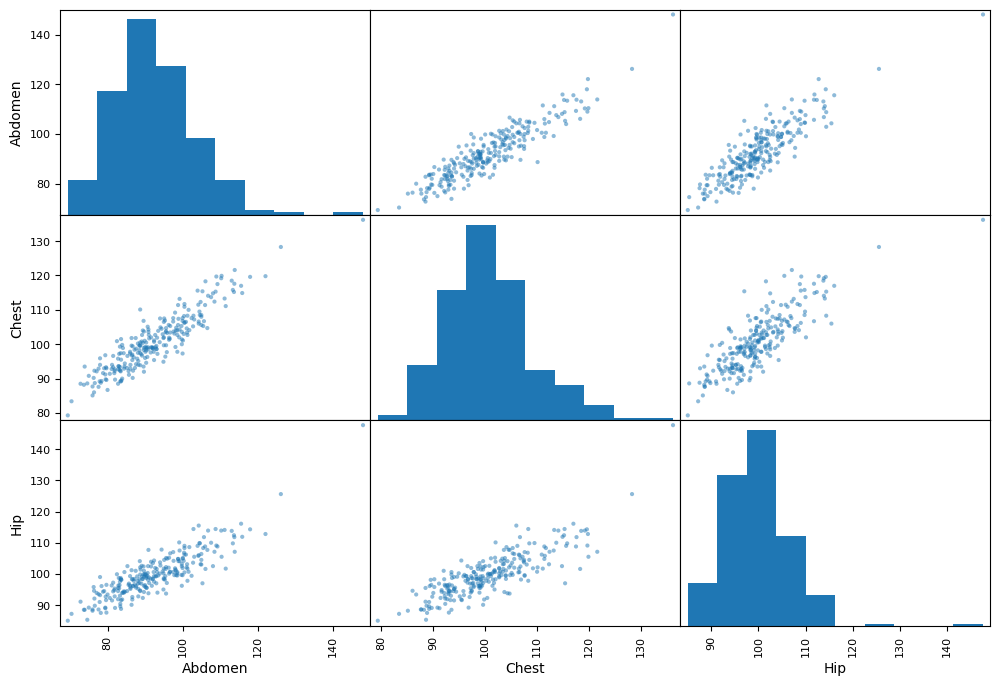

In [ ]:
# Correlaciones representadas gráficamente
atributos = ["Abdomen", "Chest", "Hip"]

scatter_matrix(df[atributos], figsize=(12, 8))
plt.show()

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 80/20 ya que son poquitos datos
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 136 to 102
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  201 non-null    float64
 1   BodyFat  201 non-null    float64
 2   Age      201 non-null    int64  
 3   Weight   201 non-null    float64
 4   Height   201 non-null    float64
 5   Neck     201 non-null    float64
 6   Chest    201 non-null    float64
 7   Abdomen  201 non-null    float64
 8   Hip      201 non-null    float64
 9   Thigh    201 non-null    float64
 10  Knee     201 non-null    float64
 11  Ankle    201 non-null    float64
 12  Biceps   201 non-null    float64
 13  Forearm  201 non-null    float64
 14  Wrist    201 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 25.1 KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 165 to 38
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  51 non-null     float64
 1   BodyFat  51 non-null     float64
 2   Age      51 non-null     int64  
 3   Weight   51 non-null     float64
 4   Height   51 non-null     float64
 5   Neck     51 non-null     float64
 6   Chest    51 non-null     float64
 7   Abdomen  51 non-null     float64
 8   Hip      51 non-null     float64
 9   Thigh    51 non-null     float64
 10  Knee     51 non-null     float64
 11  Ankle    51 non-null     float64
 12  Biceps   51 non-null     float64
 13  Forearm  51 non-null     float64
 14  Wrist    51 non-null     float64
dtypes: float64(14), int64(1)
memory usage: 6.4 KB


In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("BodyFat", axis=1)
y_train = train_set["BodyFat"].copy()

X_test = test_set.drop("BodyFat", axis=1)
y_test = test_set["BodyFat"].copy()

In [ ]:
X_train

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,1.0491,39,166.75,70.75,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,1.0473,54,198.00,72.00,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,1.0209,44,223.00,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,1.0678,51,149.25,69.75,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,1.0322,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0547,43,200.25,73.50,38.6,105.2,102.8,103.6,61.2,39.3,23.5,30.5,28.5,18.1
14,1.0484,35,187.75,69.50,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2
92,1.0795,47,165.25,70.50,37.5,97.2,83.1,95.4,56.9,38.3,22.1,30.1,28.2,18.4
179,1.0603,39,234.75,74.50,42.8,109.5,104.5,109.9,69.5,43.1,25.8,39.1,32.5,19.9


In [ ]:
y_train

136    21.8
55     22.6
204    34.8
216    13.6
147    29.6
       ... 
106    19.3
14     22.1
92      8.5
179    16.9
102    20.1
Name: BodyFat, Length: 201, dtype: float64

#Modelo Regresión Lineal Múltiple


In [ ]:
#Escogeremos las categorias de entrada
X_train_mult = X_train[['Abdomen','Chest', 'Hip', 'Weight', 'Thigh', 'Density']]
X_test_mult = X_test[['Abdomen','Chest', 'Hip', 'Weight', 'Thigh', 'Density']]

# las transformamos en arreglo de 2 dimensiones
X_train_mult2D = X_train_mult.values
X_test_mult2D = X_test_mult.values

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_regMult = LinearRegression()
lin_regMult.fit(X_train_mult2D, y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_regMult.predict(X_test_mult2D)
y_pred

array([19.59290171, 19.53817684, 27.97513205, 20.53041423, 16.70559048,
       12.29385066, 22.79160703, 19.26463546, 12.14373948, 12.60970436,
       26.55226921, 24.58170696, 15.4041598 , 22.35846945,  6.47413299,
        5.5135202 , 21.49886062, 20.69042316, 20.36575027, 13.47392453,
       15.18063714, 17.44256753, 14.41335406, 13.79756337, 21.84893133,
       30.72245709, 24.41893025, 15.34426885,  7.58405391, 13.52882831,
       24.6416738 , 10.44157301, 17.71242346, 19.05527829, 19.40714147,
        4.03285583, 21.48624946, 16.2899149 , 17.15788802, 11.80892199,
       14.06765606, 23.83375503, 30.49217061,  9.31972342, 13.863975  ,
       22.18162179, 28.27252576, 20.85119404, 23.16618205, 10.23518129,
       37.06861986])

In [ ]:
lin_regMult.score(X_test_mult2D, y_test)

0.994117775558846

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(lin_regMult, "07MasaCorporal.pkl")

['07MasaCorporal.pkl']

In [ ]:
# Cargar modelo
#regLinealCargado = joblib.load("07MasaCorporal.pkl")

#Modelo Regresión Lineal Simple

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(X_train['Density'].values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_reg.predict(X_test['Density'].values.reshape(-1, 1))
y_pred

array([19.47414491, 19.47414491, 27.86968721, 20.68587266, 16.96413742,
       12.37688235, 23.23915614, 18.86828103, 11.98739842, 12.24705437,
       26.09537157, 24.49415989, 15.10326979, 22.59001628,  6.57789952,
        5.45272375, 22.11398037, 21.07535658, 20.55604469, 14.32430195,
       15.18982178, 16.83430944, 14.19447398, 14.064646  , 21.5081165 ,
       30.07676276, 23.62864007, 15.27637376,  7.31359137, 13.37223014,
       24.97019579,  9.91015085, 17.82965724, 18.65190107, 18.95483301,
        3.80823608, 21.59466848, 16.31499755, 16.83430944, 11.85757045,
       14.10792199, 23.67191606, 30.81245461,  9.69377089, 14.23774997,
       22.59001628, 28.82175901, 21.63794447, 23.36898412, 10.21308278,
       34.49091387])

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.07


In [ ]:
# El mejor puntaje es el que esta cercano a 1
print('Variance Score: %.2f' % r2_score(y_test, y_pred))

Variance Score: 1.00


In [ ]:
lin_reg.score(X_test['Density'].values.reshape(-1, 1), y_test)

0.9984513905607759

#Evaluación

In [ ]:
# Parámetro theta 0
lin_reg.intercept_

475.99257642806856

In [ ]:
# Parámetro theta 1
lin_reg.coef_

array([-432.75991233])

In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[X_train["Density"].min()], [X_train["Density"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

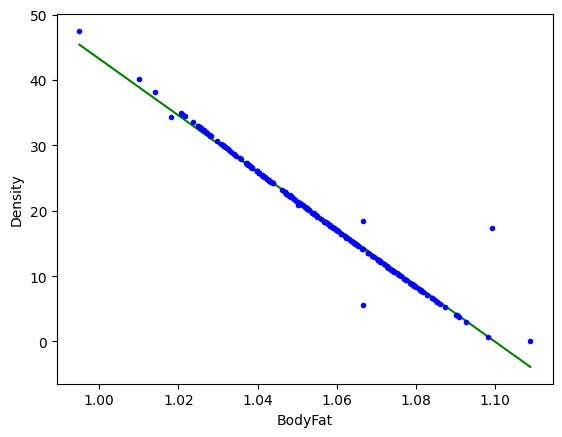

In [ ]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(X_train['Density'], y_train, "b.")
plt.xlabel("BodyFat")
plt.ylabel("Density")
plt.show()

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(lin_reg, "07MasaCorporal.pkl")

['07MasaCorporal.pkl']

#Conclusión
Para este ejemplo, el modelo predice un 99% de la variabilidad de los datos. Utilizando la regresión lineal múltiple o regresión lineal simple.